# Data Trained- Practice -Happiness Data Set- Sudha Udayakumar

# Stages of Machine Learning

# Introduction (Define Problem)

## Problem Statement Given

## Problem Statement (Summarized)

# Choose Right Tools

## Importing and Installing the Packages

In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)       # To display all the data in each column
pd.set_option('display.precision', 3)               # To display values only upto three decimal places.
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', font_scale = 1.3, color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline


import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Handling Warnings

In [2]:
warnings.filterwarnings('ignore') # ignore warnings.
%config IPCompleter.greedy = True # autocomplete feature.
pd.options.display.max_rows = None # set maximum rows that can be displayed in notebook.
pd.options.display.max_columns = None # set maximum columns that can be displayed in notebook.
pd.options.display.precision = 2 # set the precision of floating point numbers.

# Loading Data

In [3]:
 # Importing training dataset using pd.read_csv from github. Not saving the file locally 
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [4]:
#save the CSV file to a local folder, so that we can use it while uploading to Github
#df.to_csv("happiness_ML.csv")

In [5]:
# to have a quick glance of data
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47
4,Canada,North America,5,7.43,0.04,1.33,1.32,0.91,0.63,0.33,0.46,2.45


<span style='background:yellow'> Observation: The table is loaded fully and we can see the data</span>

## Description of Data

<span style='background:yellow'>Observation: We can see that each feature has multiple types in them and all might impact our dataset/span>

# Pre-Profiling of Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

<span style='background:yellow'>Observation: There are 2 object columns, 1 integer and 9 float data. There is no missing data</span>

In [7]:
df.shape

(158, 12)

<span style='background:yellow'>Observation: There are 158 rows and 12 columns</span>

In [8]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

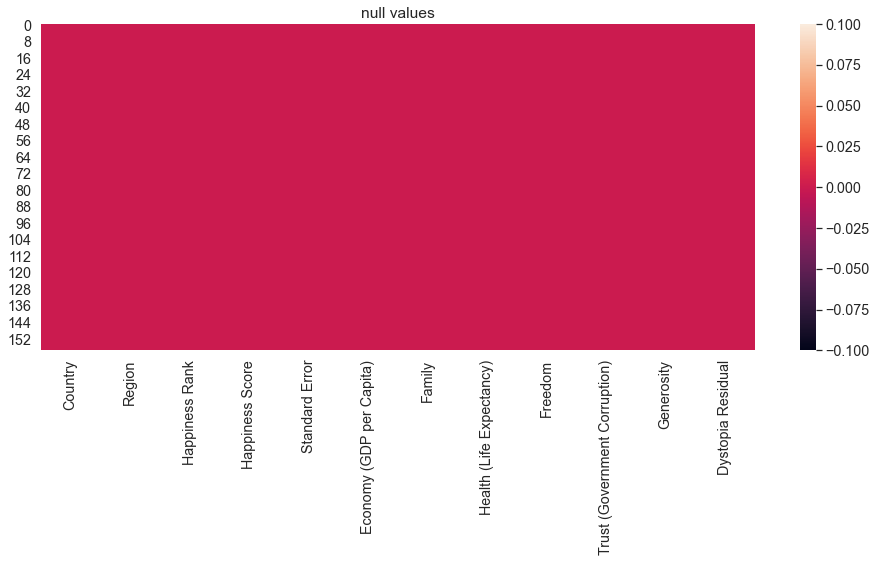

In [9]:
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("null values")
plt.show()

<span style='background:yellow'>Observation: We already saw there are no missing values. We confirmed it using a heatmap. Increased the figure size to see all the columns
and there are no white dots/lines, so we can confirm with the heatmap there are no missing values</span>

## Expoloratory Data Anlysis- EDA

### Univariate Analysis

In [10]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

<span style='background:yellow'>Observation: Getting the column names, to understand further few columns </span>

In [11]:
df["Region"].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

<span style='background:yellow'>Observation: Region has 10 regions covered  </span>

In [12]:
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

<span style='background:yellow'>Observation:Was checking to see if we can bucketize the Happiness score. But there are 157 values, so decided to drop the bucketizing  </span>

In [13]:
from pandas_profiling import ProfileReport

In [14]:
# we pip installed pandas_profiling while choosing the right tools. Here we are importing pandas_profiling
import pandas_profiling

In [15]:
#Pandas Profiling report, saved to an external html file 
#Since this is pre-processing the data, we have named the html file similar to it
profile = pandas_profiling.ProfileReport(df)
profile.to_file(output_file='Happiness Score Preprofiling.html')

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<span style='background:yellow'>Observation: Used Pandas pre-profiling to see the data. we can confirm
    there are no missing data, Happiness Score & Happiness Rank are linearly related as well.</span>

### Bi-variate Analysis

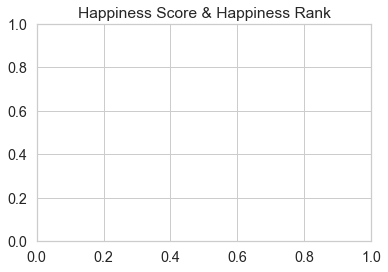

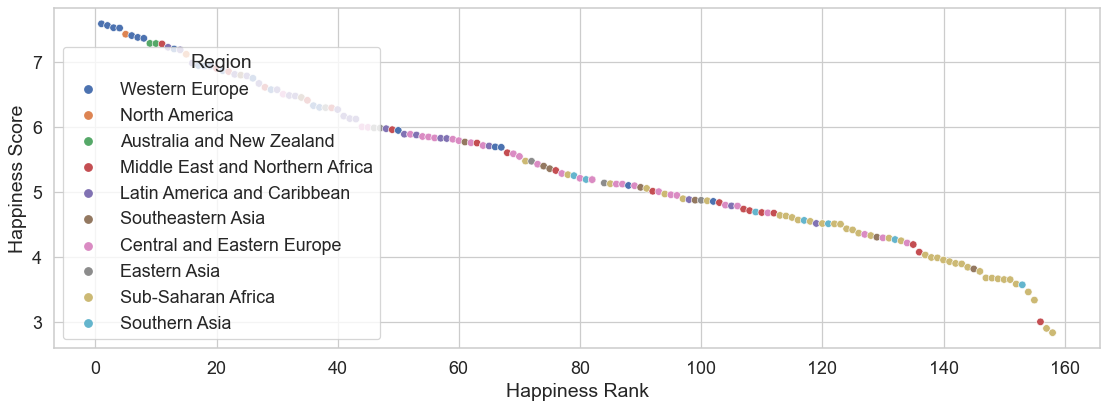

In [16]:
plt.title('Happiness Score & Happiness Rank')
plt.figure(figsize=(15,5), dpi=90)
sns.scatterplot(df['Happiness Rank'], df['Happiness Score'],hue=df['Region']);



<span style='background:yellow'>Observation: As seen in Padas profiling, we can see that Happiness Rank & Happiness Score are
    linear related. Higher the rank, lower the happiness score and mostly Sub-Saharan African is see in the lower rankings of 135+
    </span>

### Multi-Variate Analysis

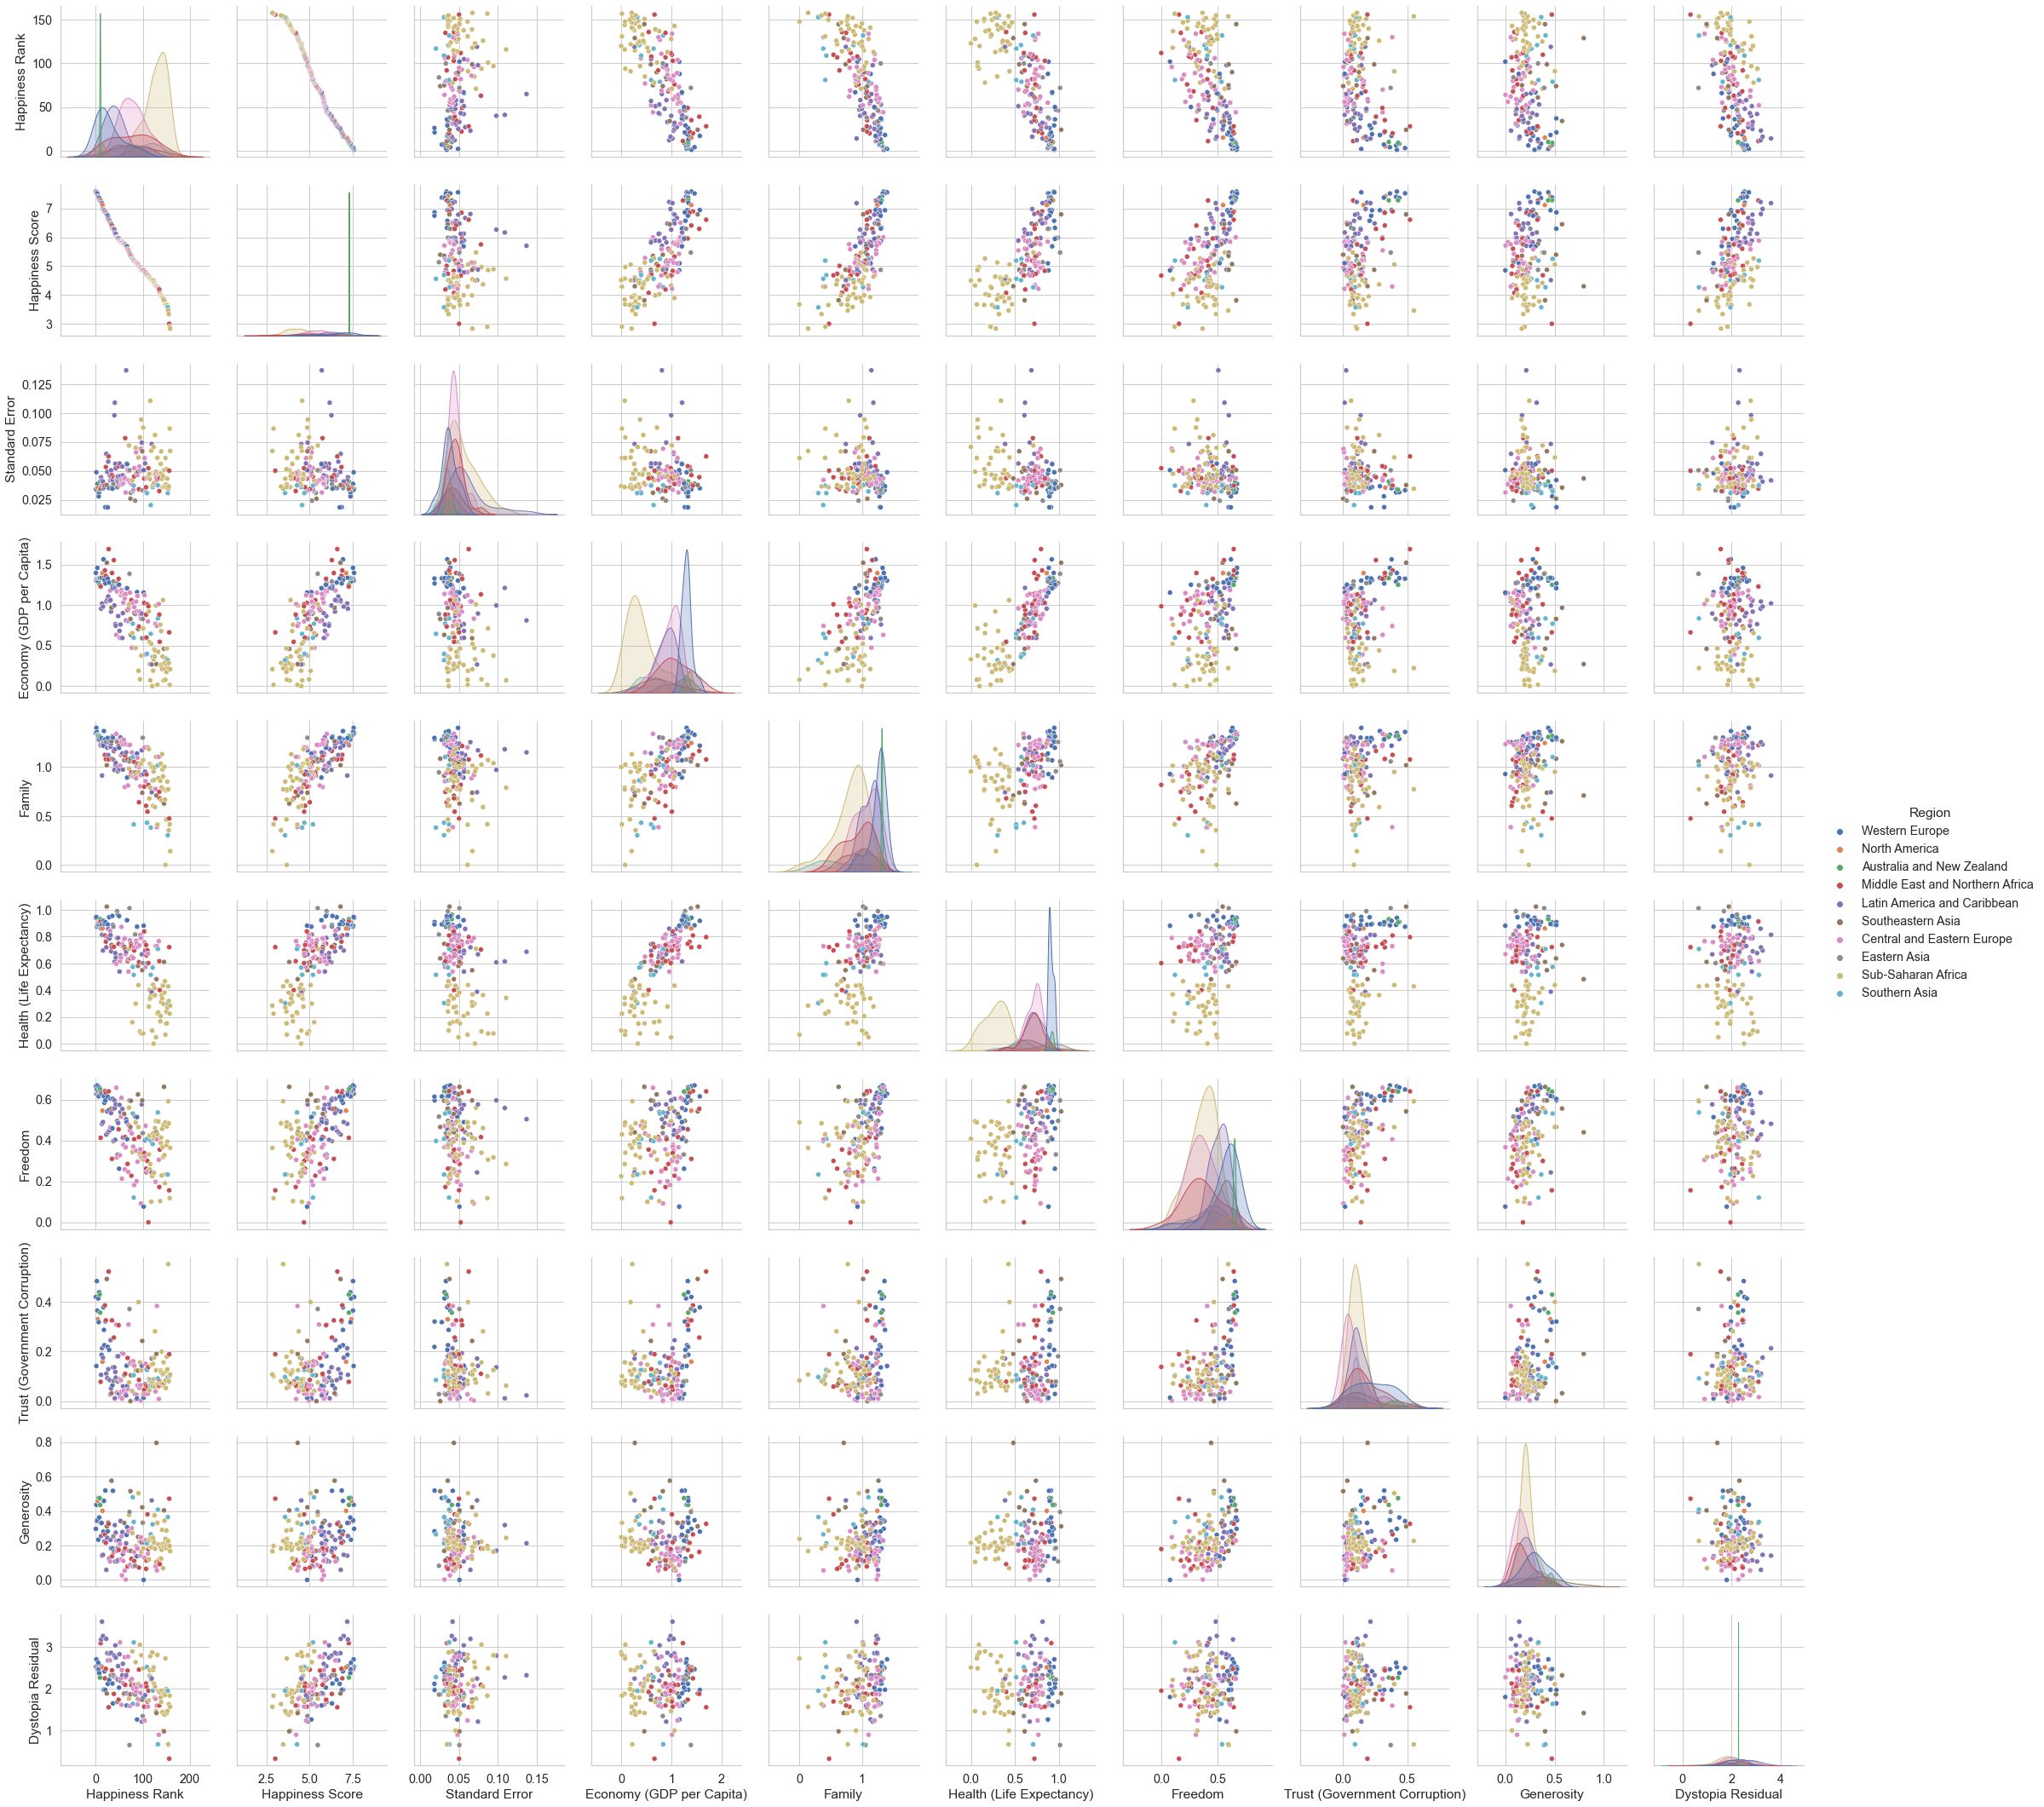

In [17]:
sns.pairplot(df,hue="Region", height=3);

<span style='background:yellow'>Observation: Very difficult to read the co-relation. so lets see below and rank them </span>

In [18]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00
mean,79.49,5.38,0.05,0.85,0.99,0.63,0.43,0.14,0.24,2.10
std,45.75,1.15,0.02,0.40,0.27,0.25,0.15,0.12,0.13,0.55
min,1.00,2.84,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.33
25%,40.25,4.53,0.04,0.55,0.86,0.44,0.33,0.06,0.15,1.76
50%,79.50,5.23,0.04,0.91,1.03,0.70,0.44,0.11,0.22,2.10
75%,118.75,6.24,0.05,1.16,1.21,0.81,0.55,0.18,0.31,2.46
max,158.00,7.59,0.14,1.69,1.40,1.03,0.67,0.55,0.80,3.60


<span style='background:yellow'>Observation: The mean is almost close to median in all columns (except happines rank)
    which means the data is normally distributed. Also no missing data is confirmed</span>

In [19]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [20]:
def corrank(X):
    import itertools
    df = pd.DataFrame([[i,j,X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['Feature1','Feature2','corr'])    
    return df.sort_values(by='corr',ascending=False).reset_index(drop=True)

# prints a descending list of correlation pair (Max on top)
display_all(corrank(df))

,Feature1,Feature2,corr
0,Economy (GDP per Capita),Health (Life Expectancy),0.82
1,Happiness Score,Economy (GDP per Capita),0.78
2,Happiness Score,Family,0.74
3,Happiness Score,Health (Life Expectancy),0.72
4,Economy (GDP per Capita),Family,0.65
5,Happiness Score,Freedom,0.57
6,Family,Health (Life Expectancy),0.53
7,Happiness Score,Dystopia Residual,0.53
8,Freedom,Trust (Government Corruption),0.49
9,Family,Freedom,0.44


<span style='background:yellow'>Observation: We can see that Happiness Rank, actually disturbs the co-relation. So lets drop it with the other 
    object columns Region & Country before model building</span>

In [21]:
df_new= df.drop(['Country', 'Region', 'Happiness Rank'], axis=1, inplace=True)

In [22]:
df.columns

Index(['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

<span style='background:yellow'>Observation: We can see the 3 columns we planend Happiness Rank, Region and country are dropped from the columns above and head data below  </span>

In [23]:
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52
1,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70
2,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49
3,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47
4,7.43,0.04,1.33,1.32,0.91,0.63,0.33,0.46,2.45


<span style='background:pink'>Note: Now we are going to run the co-relation again after removing the unwanted columns </span>

In [24]:
df.columns

Index(['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

In [25]:
def corrank(X):
    import itertools
    df = pd.DataFrame([[i,j,X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['Feature1','Feature2','corr'])    
    return df.sort_values(by='corr',ascending=False).reset_index(drop=True)

# prints a descending list of correlation pair (Max on top)
display_all(corrank(df))

,Feature1,Feature2,corr
0,Economy (GDP per Capita),Health (Life Expectancy),0.82
1,Happiness Score,Economy (GDP per Capita),0.78
2,Happiness Score,Family,0.74
3,Happiness Score,Health (Life Expectancy),0.72
4,Economy (GDP per Capita),Family,0.65
5,Happiness Score,Freedom,0.57
6,Family,Health (Life Expectancy),0.53
7,Happiness Score,Dystopia Residual,0.53
8,Freedom,Trust (Government Corruption),0.49
9,Family,Freedom,0.44


<span style='background:yellow'>Observation: We can see the observations have reduced from 44 to 35, after removing one column </span>


<span style='background:pink'>Note: After running the Linear regression later in the notebook, we will see that our correlation is reflecting almost true, in the linear equation </span>

## Outliers & Skewness Handling

In [26]:
df.skew()

Happiness Score                  0.10
Standard Error                   1.98
Economy (GDP per Capita)        -0.32
Family                          -1.01
Health (Life Expectancy)        -0.71
Freedom                         -0.41
Trust (Government Corruption)    1.39
Generosity                       1.00
Dystopia Residual               -0.24
dtype: float64

<span style='background:yellow'>Observation: Skewness should be -0.5 to +0.5, and we see skewness, so lets remove the outliers and see if it improves </span>

### Outlier Removal

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df))

new_df=df[(z<3).all(axis=1)]

#we are removing all data, which has Z score greater than 3

In [28]:
new_df.shape

(149, 9)

In [29]:
df.shape

(158, 9)

In [31]:
(9/158)*100


5.69620253164557

In [32]:
#6% of data, less than than 10% so we can remove them

### Skewness Handling

In [33]:
new_df.skew()

Happiness Score                  0.17
Standard Error                   1.24
Economy (GDP per Capita)        -0.39
Family                          -0.81
Health (Life Expectancy)        -0.75
Freedom                         -0.40
Trust (Government Corruption)    1.27
Generosity                       0.65
Dystopia Residual               -0.02
dtype: float64

<span style='background:yellow'>Observation: We still see some skewness, so lets remove the skewness using Power Transform  </span>

In [34]:
from sklearn.preprocessing import power_transform
skew_new=power_transform(new_df)

skew_new=pd.DataFrame(skew_new,columns=new_df.columns)

In [35]:
skew_new.skew()

Happiness Score                 -0.02
Standard Error                  -0.03
Economy (GDP per Capita)        -0.14
Family                          -0.15
Health (Life Expectancy)        -0.19
Freedom                         -0.08
Trust (Government Corruption)    0.17
Generosity                       0.03
Dystopia Residual                0.01
dtype: float64

<span style='background:yellow'>Observation: Now we see our skewness is in the range of -0.5 to +0.5, so we are good to use the data  </span>

## Standard Scalar

In [36]:
skew_new.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.57,-3.05,-1.96,-2.09,-1.97,-2.36,-1.98,-2.56,-2.76
25%,-0.72,-0.67,-0.76,-0.66,-0.85,-0.72,-0.73,-0.72,-0.63
50%,-0.09,-0.04,0.08,-0.05,0.13,-0.03,-0.06,-0.03,-0.04
75%,0.80,0.51,0.76,0.90,0.71,0.78,0.65,0.69,0.66
max,1.83,2.47,2.04,2.01,2.04,1.79,1.97,2.25,2.86


<span style='background:yellow'>Observation: The data looks fine and all columns are in similar range, so we need use standard scalar. however lets use Standar scalar and double check  </span>


In [37]:

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(skew_new)


In [38]:
scaledX

array([[ 1.82591162, -0.95033703,  1.49245411, ...,  1.81762512,
         0.65957854,  0.75525527],
       [ 1.80625025,  0.37856182,  1.19406711, ...,  0.32967609,
         1.56260401,  1.11116834],
       [ 1.78048469, -1.04140135,  1.26661161, ...,  1.95339954,
         0.97722591,  0.70649452],
       ...,
       [-1.7899869 , -1.32081011, -1.36521585, ..., -0.19284338,
         1.13425805, -0.32711524],
       [-2.05390647, -0.69272644, -1.43304072, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [-2.56623509,  2.17876604, -1.93874732, ..., -0.14727362,
        -0.17248609, -0.55359235]])

In [39]:
features=pd.DataFrame(scaledX)
features.describe()

,0,1,2,3,4,5,6,7,8
count,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00,149.00
mean,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.57,-3.05,-1.96,-2.09,-1.97,-2.36,-1.98,-2.56,-2.76
25%,-0.72,-0.67,-0.76,-0.66,-0.85,-0.72,-0.73,-0.72,-0.63
50%,-0.09,-0.04,0.08,-0.05,0.13,-0.03,-0.06,-0.03,-0.04
75%,0.80,0.51,0.76,0.90,0.71,0.78,0.65,0.69,0.66
max,1.83,2.47,2.04,2.01,2.04,1.79,1.97,2.25,2.86


<span style='background:yellow'>Observation: From the describe before and after standard scalar we see the minimum & Maximum values are the same for the each column. So lets not used the standard scalar data and use the skew_new df itself   </span>

# Model Building

## Splitting into Train & Test data

In [40]:
x=skew_new.drop("Happiness Score",axis=1)
x.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.95,1.49,1.66,1.47,1.75,1.82,0.66,0.76
1,0.38,1.19,2.01,1.51,1.44,0.33,1.56,1.11
2,-1.04,1.27,1.73,1.05,1.62,1.95,0.98,0.71
3,-0.47,1.70,1.54,1.12,1.79,1.66,1.02,0.66
4,-0.80,1.27,1.49,1.24,1.48,1.54,1.68,0.63


In [41]:
y=skew_new["Happiness Score"]
y.head()

0   1.83
1   1.81
2   1.78
3   1.78
4   1.70
Name: Happiness Score, dtype: float64

## Import Libraries for Model building

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error
from math import sqrt

### Train & Test Shape

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 8)
(30, 8)
(119,)
(30,)


### Building model in 2 methods

<span style='background:pink'>Note- Model Evaluation: Since this is a Balanced Regression Data Set
    we are going to use R2 and other Error Models like MAE, MSE, RMSE for our Model Evaluation. Also to avoid the Overfitting and underfitting issues
    we are going to use the Cross Validation. </span>

#### Method 1: Model Building and Model evaluation for each model

In [44]:
avg_target=y.mean()
avg_target

-2.3545669515540233e-16

#### Instantiating the Models

In [45]:
lm=LinearRegression()
ridge = Ridge()
gb= GradientBoostingRegressor()
dt  = DecisionTreeRegressor()
rf  = RandomForestRegressor()
knn = KNeighborsRegressor()


#### Method 1: building models and printing each model evaluation score

In [46]:
model=[lm,ridge,gb,dt,rf,knn]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print("\n Model: ",m)
    print("R2:", r2_score(y_test,pred))
    print("MAE:", mean_absolute_error(y_test,pred))
    print("MSE:", mean_squared_error(y_test,pred))
    print("RMSE:", sqrt(mean_squared_error(y_test,pred)))    
    score=cross_val_score(m,x,y,cv=5)
    print("5 cross val:", score)
    print("cross val mean:", score.mean())
    



 Model:  LinearRegression()
R2: 0.9885449292256185
MAE: 0.07903202817481345
MSE: 0.010805565899057384
RMSE: 0.10394982394914089
5 cross val: [-0.02485031  0.73440922  0.51072548  0.7164424   0.43497899]
cross val mean: 0.4743411563927073

 Model:  Ridge()
R2: 0.9891574879978361
MAE: 0.07696821050580152
MSE: 0.010227739335554544
RMSE: 0.10113228631626274
5 cross val: [0.11159137 0.72388462 0.51346031 0.73306486 0.39488731]
cross val mean: 0.49537769630187906

 Model:  GradientBoostingRegressor()
R2: 0.9229444529751107
MAE: 0.21108099938270158
MSE: 0.07268648161716094
RMSE: 0.26960430563542737
5 cross val: [-3.80001154 -0.35743591 -0.92988078 -3.04280198 -3.54415615]
cross val mean: -2.334857271446348

 Model:  DecisionTreeRegressor()
R2: 0.7424219480940955
MAE: 0.40709748901535625
MSE: 0.24297332324167703
RMSE: 0.4929232427484801
5 cross val: [ -6.62959049  -9.16868965  -6.28608366 -11.75967666  -5.47456433]
cross val mean: -7.863720962000056

 Model:  RandomForestRegressor()
R2: 0.868

#### Method 2: Model Building + Model Evaluation in one Step

In [47]:
modelList=[("Lin Reg", lm), ("Ridge", ridge),("Gradient boost",gb),("Decision Tree", dt),("Random Forest",rf),("Kneigbor",knn)]

def GetAccuracy(x,y,modelList):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43)
    modelerror=[]
    ModelName= []
    modelR2=[]
    modelMAE=[]
    modelMSE=[]
    modelRMSE=[]
    modelCrossval=[]
    AccuracyCVDiff=[]
    for Nameofmodel, modelInstance in modelList:
        ModelName.append(Nameofmodel)
        modelInstance.fit(x_train,y_train)
        pred=modelInstance.predict(x_test)
        error=modelInstance.score(x_train,y_train)
        modelerror.append(error)
        r2=r2_score(y_test,pred)
        modelR2.append(r2)
        mae = mean_absolute_error(y_test,pred)
        modelMAE.append(mae)
        MSE=mean_squared_error(y_test,pred)
        modelMSE.append(MSE)
        RMSE=sqrt(mean_squared_error(y_test,pred))
        modelRMSE.append(RMSE)
        
        crossAcc=cross_val_score(modelInstance,x,y,cv=5).mean()
        modelCrossval.append(crossAcc)
        
    df_acc=pd.DataFrame({"Name":ModelName,
                         "Error":modelerror,
                         "R2": modelR2,
                         "MAE": modelMAE,
                         "MSE": modelMSE,
                         "RMSE": modelRMSE,                         
                         "CrossValidation":modelCrossval
                          })
    return df_acc
GetAccuracy(x,y,modelList)
    


,Name,Error,R2,MAE,MSE,RMSE,CrossValidation
0,Lin Reg,0.99,0.99,0.08,0.01,0.10,0.47
1,Ridge,0.99,0.99,0.08,0.01,0.10,0.50
2,Gradient boost,1.00,0.92,0.21,0.07,0.27,-2.42
3,Decision Tree,1.00,0.68,0.41,0.27,0.52,-7.71
4,Random Forest,0.98,0.86,0.27,0.12,0.35,-3.55
5,Kneigbor,0.92,0.89,0.23,0.09,0.30,-5.45


<span style='background:yellow'>Observation: 
R2 Score 0.55 means, 55% changes are coming from y answers,
r-squared shows how well the data fit the regression model (the goodness of fit).
definition: R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable.
For example, an r-squared of 60% reveals that 60% of the data fit the regression model. usually, a higher r-squared indicates a better fit for the model.
depending on the problem statement, r2_score is achieved

Mean Absolute Error (MAE): This measures the absolute average distance between the real data and the predicted data, but it fails to punish large errors in prediction.

MSE: This measures the squared average distance between the real data and the predicted data. Here, larger errors are well noted. But the disadvantage is that it also squares up the units of data as well.lower is better, as these are the differences of actual and predicted values

.RMSE: This is the square root of MSE.

lower is better, as these are the differences of actual and predicted values

we want to minimize the error

not maximaze it

The range of the r_2 score should be in between 0-1</span>

<span style='background:pink'>Note: our R2 score is in the range between 0 to 1 for all models. So let us take the Linear Regression and KNN models and analysse further </span>

## Fine Tuning the Model

# Linear Regression

<span style='background:green'>Info: In simple words Linear Regression equation is written as y=mx+c, so let us print these below. </span>

In [48]:
lm.intercept_

0.0011266667750549006

In [49]:
lm.coef_

array([0.01067181, 0.34711256, 0.24307911, 0.23949765, 0.12891617,
       0.05012177, 0.09063126, 0.46958728])

<span style='background:yellow'>Observation: We have printed the Intercept and Coeficient above </span>

In [50]:

reg = LinearRegression()
reg.fit(x, y)
inter = reg.intercept_
coefs = reg.coef_
score = reg.score(x, y)
score

0.9877800625826578

In [51]:
df.columns


Index(['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

In [52]:
equation = 'Happiness Score ='
for x, coef in zip(x, coefs):
    if coef >= 0:
        equation += ' + '
    else:
        equation += ' - '
        coef *= -1
    equation += f'{round(coef, 3)} * {x}'
if inter >= 0:
    equation += f' + {round(inter, 3)}'
else:
    inter *= -1
    equation += f' - {round(inter, 3)}'
equation

'Happiness Score = + 0.015 * Standard Error + 0.349 * Economy (GDP per Capita) + 0.227 * Family + 0.243 * Health (Life Expectancy) + 0.137 * Freedom + 0.05 * Trust (Government Corruption) + 0.081 * Generosity + 0.463 * Dystopia Residual - 0.0'

<span style='background:yellow'>Observation: We have printed the equation y=mx+c. This is close to the co-relation we checked earlier </span>

<span style='background:yellow'>Observation: Below let us arrange them in order of weightage. So they again confirm, the top rows were the top ones in co-relation as well  </span>

In [53]:
df_weights = pd.DataFrame({'feature ': x, 'weight ': coefs})
df_weights.sort_values(by=['weight '], ascending=False, inplace=True)
df_weights

,feature,weight
7,Dystopia Residual,0.46
1,Dystopia Residual,0.35
3,Dystopia Residual,0.24
2,Dystopia Residual,0.23
4,Dystopia Residual,0.14
6,Dystopia Residual,0.08
5,Dystopia Residual,0.05
0,Dystopia Residual,0.01


## KNN- Fine Tuning

<span style='background:pink'>Note: We have around 8 columns and so our neighbors range is always taken as odd value. So we will take as 9. Also if the columns were very high, we could have taken the square root of the columns. Since our columns are less, we can use 9 itself, so we will give the range of 1 to 10 </span>

In [54]:

rmse_val = []

for i in range(1,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

Text(0, 0.5, 'RMSE')

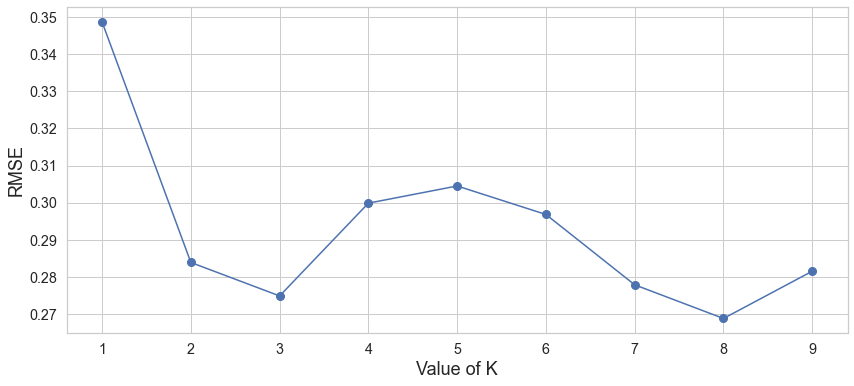

In [55]:
plt.figure(figsize=(14,6))
plt.plot(range(1,10),rmse_val,marker="o",markersize=8)
plt.xlabel("Value of K",fontsize=18)
plt.ylabel("RMSE",fontsize=18)

In [56]:

knn_model  = KNeighborsRegressor(n_neighbors=8)
knn_model.fit(x_train,y_train)
knn_model.score(x_train,y_train)

0.9189591163023156

In [57]:

#do Prediction on Test Dataset

knn_prediction = knn_model.predict(x_test)
r2_score(y_test,knn_prediction)

0.9233629395097458

<span style='background:yellow'>Observation: Our R2 Score has imporved from 0.89 to 0.92
    also our MAE(0.26 to 0.23), MSE (0.12 to 0.09), RMSE scores (0.34 to 0.30) have reduced as well from the earlier values
    the old and new values are given in the brackets for reference</span>

In [58]:
print("MAE:",mean_absolute_error(y_test,knn_prediction))
print("MSE:",mean_squared_error(y_test,knn_prediction))
print("RMSE:",sqrt(mean_squared_error(y_test,knn_prediction)))

MAE: 0.20601311966879265
MSE: 0.07229172335534556
RMSE: 0.2688712021681488


# Saving the model

In [59]:
import joblib
joblib.dump(knn_model,"Happiness.pkl")

['Happiness.pkl']

# Loading the Saved Model

In [60]:
model=joblib.load("Happiness.pkl")


In [61]:
prediction=model.predict(x_test)

In [62]:
prediction=pd.DataFrame(prediction) #converting to a Data Frame

In [63]:
prediction.head()  #checking the top 5 values, to double check fi there are predictions

,0
0,0.35
1,-0.77
2,-0.55
3,0.82
4,0.45


In [64]:
prediction.to_csv(' HappinessResults.csv') #saving the prediction

<span style='background:pink'>Note:Save & Load the model. Saved the model and before handing over, just loaded & test the model to see if its working fine
   and if predictions are coming up. All were working fine   </span>
